/usr/local/home/zlnh4/.local/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


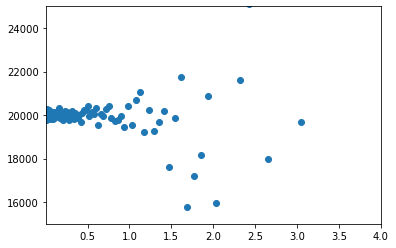

In [139]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit


TAU = pd.read_csv("decay_data/mono_decay.csv")["TAU"]

T1 = 0.5
S1 = 20000

def mono_exp(t, S1):
    return S1 * np.exp(-t / T1)

fitted = []
   
for t in TAU:
    INTENSITY = mono_exp(np.array([t]), S1) + np.array([10 * np.random.normal(0,10)])
    params, covar = curve_fit(mono_exp, np.array([t]), INTENSITY, p0=[20000])
    fitted.append(params[0])



plt.scatter(TAU, fitted)
plt.ylim(15000, 25000)
plt.xlim(0.005, 4)
plt.show()


In [153]:
# Create synthetic biexponential decay data

def bi_exp(t, S1, S2):
    T1_1 = 0.5
    T1_2 = 0.0005
    
    return S1 * np.exp(-t / T1_1) + S2 * np.exp(-t / T1_2)


S1_GT = 20000
S2_GT = 1000

TAU = np.logspace(-4, 1, 256)

fitted = []

for t in TAU:
    INTENSITY = bi_exp(np.array([TAU[0], t]), S1_GT, S2_GT) + np.array([10 * np.random.normal(0,10) for _ in range(2)])
    params, covar = curve_fit(bi_exp, np.array([TAU[0], t]), INTENSITY)
    
    S1, S2 = params
    fitted += [S2]

plt.figure(figsize=(30,12))
plt.scatter(TAU, fitted)
plt.xscale("log")
plt.xlim(0.00005, 4)
plt.plot()


    

[]

[]

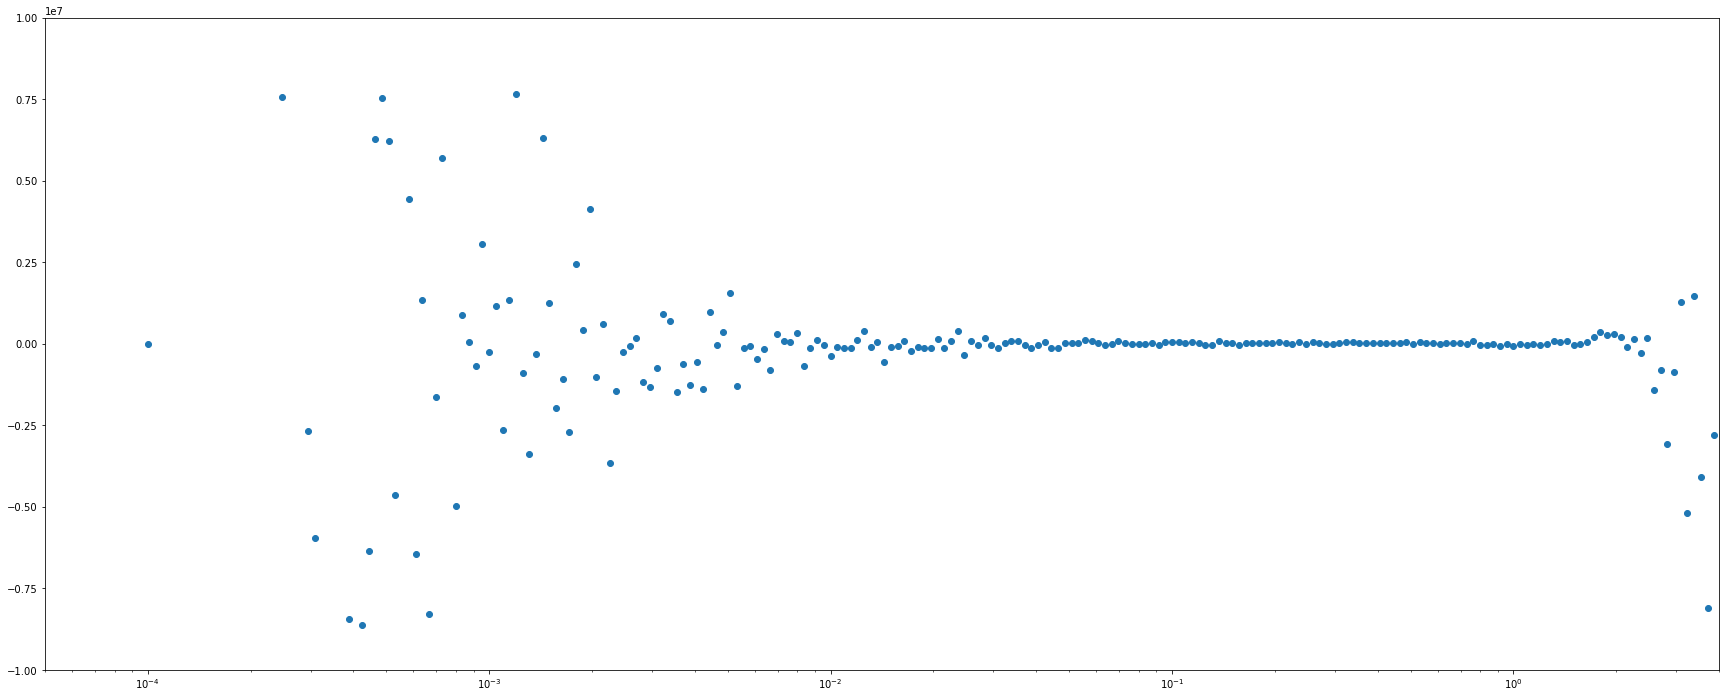

In [194]:
# Create synthetic biexponential decay data

def bi_exp(t, S1, S2):
    T1_1 = 0.5
    T1_2 = 0.25
    
    return S1 * np.exp(-t / T1_1) + S2 * np.exp(-t / T1_2)


S1_GT = 20000
S2_GT = 2000

plt.figure(figsize=(30,12))
plt.xlim(0.00005, 4)

TAU = np.logspace(-4, 1, 256)

plt.scatter(TAU, bi_exp(TAU, S1_GT, S2_GT))
plt.xscale("log")


fitted = []
fitted_s2 = []

for t in TAU:
    INTENSITY = bi_exp(np.array([TAU[0], t]), S1_GT, S2_GT) + np.array([500 * np.random.normal(0,10) for _ in range(2)])
    params, covar = curve_fit(bi_exp, np.array([TAU[0], t]), INTENSITY)
    
    S1, S2 = params
    fitted += [S1]
    fitted_s2 += [S2]

plt.figure(figsize=(30,12))
plt.scatter(TAU, fitted)
plt.xscale("log")
plt.ylim(-10000000, 10000000)
plt.xlim(0.00005, 4)
plt.plot()

plt.figure(figsize=(30,12))
plt.scatter(TAU, fitted_s2)
plt.xscale("log")
plt.ylim(-10000000, 10000000)
plt.xlim(0.00005, 4)
plt.plot()
    

[]

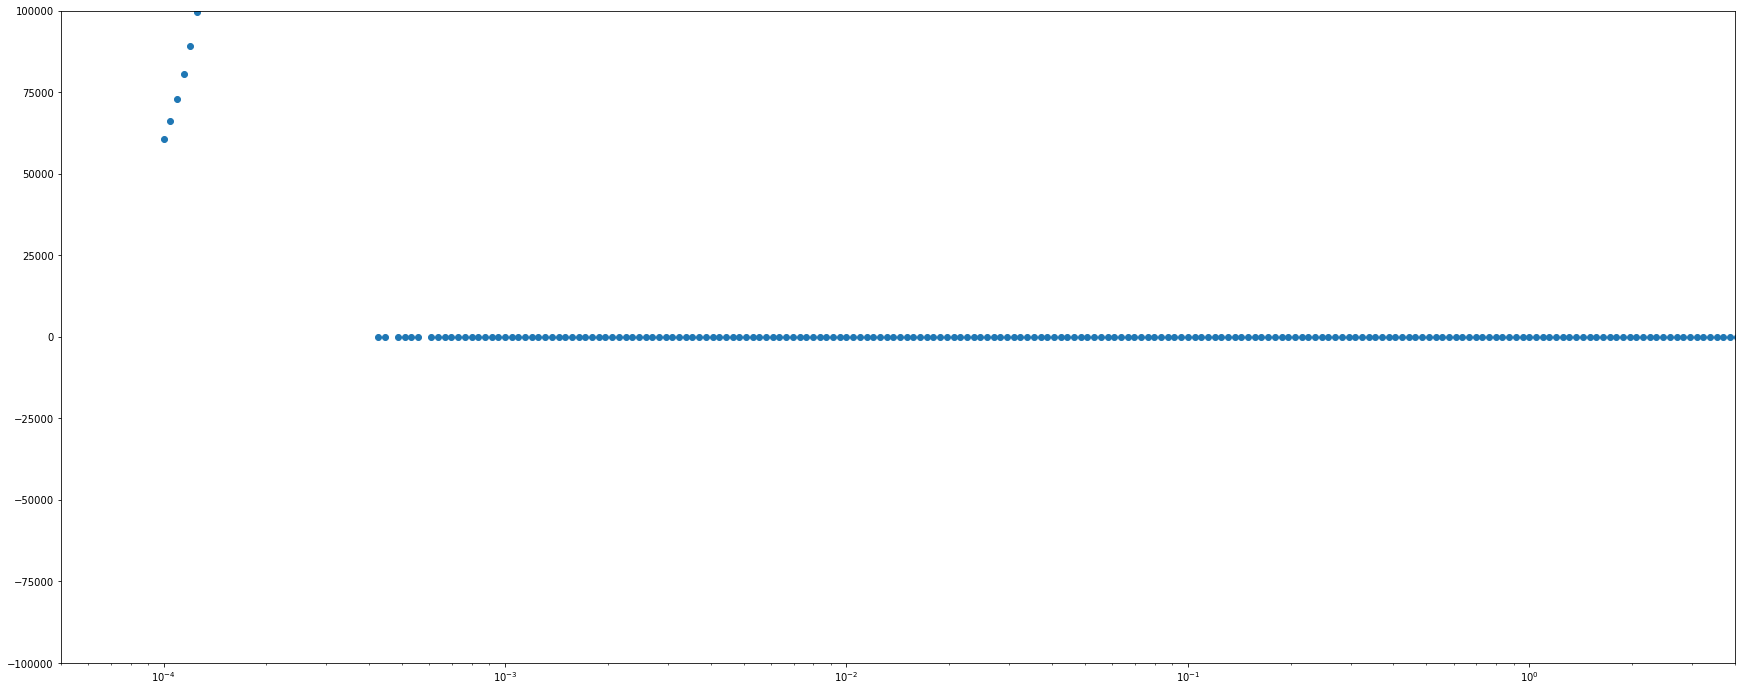

In [224]:
# Create synthetic biexponential decay data
import random

def bi_exp(t, S1, S2):
    T1_1 = 0.05
    T1_2 = 0.00005
    
    return S1 * np.exp(-t / T1_1) + S2 * np.exp(-t / T1_2)


S1_GT = 20000
S2_GT = 20000

plt.figure(figsize=(30,12))
plt.xlim(0.00005, 4)

TAU = np.logspace(-4, 1, 256)

plt.scatter(TAU, bi_exp(TAU, S1_GT, S2_GT))
plt.xscale("log")


fitted = []
fitted_s2 = []

for t in TAU:
    INTENSITY = bi_exp(np.array([TAU[0], t]), S1_GT, S2_GT) + np.array([3000 * random.choice([-1]) for _ in range(2)])
    params, covar = curve_fit(bi_exp, np.array([2, t]), INTENSITY, maxfev=60000)
    
    S1, S2 = params
    fitted += [S1]
    fitted_s2 += [S2]

plt.figure(figsize=(30,12))
plt.scatter(TAU, fitted)
plt.xscale("log")
plt.ylim(-10000000, 10000000)
plt.xlim(0.00005, 4)
plt.plot()

plt.figure(figsize=(30,12))
plt.scatter(TAU, fitted_s2)
plt.xscale("log")
plt.ylim(-100000, 100000)
plt.xlim(0.00005, 4)
plt.plot()

[]

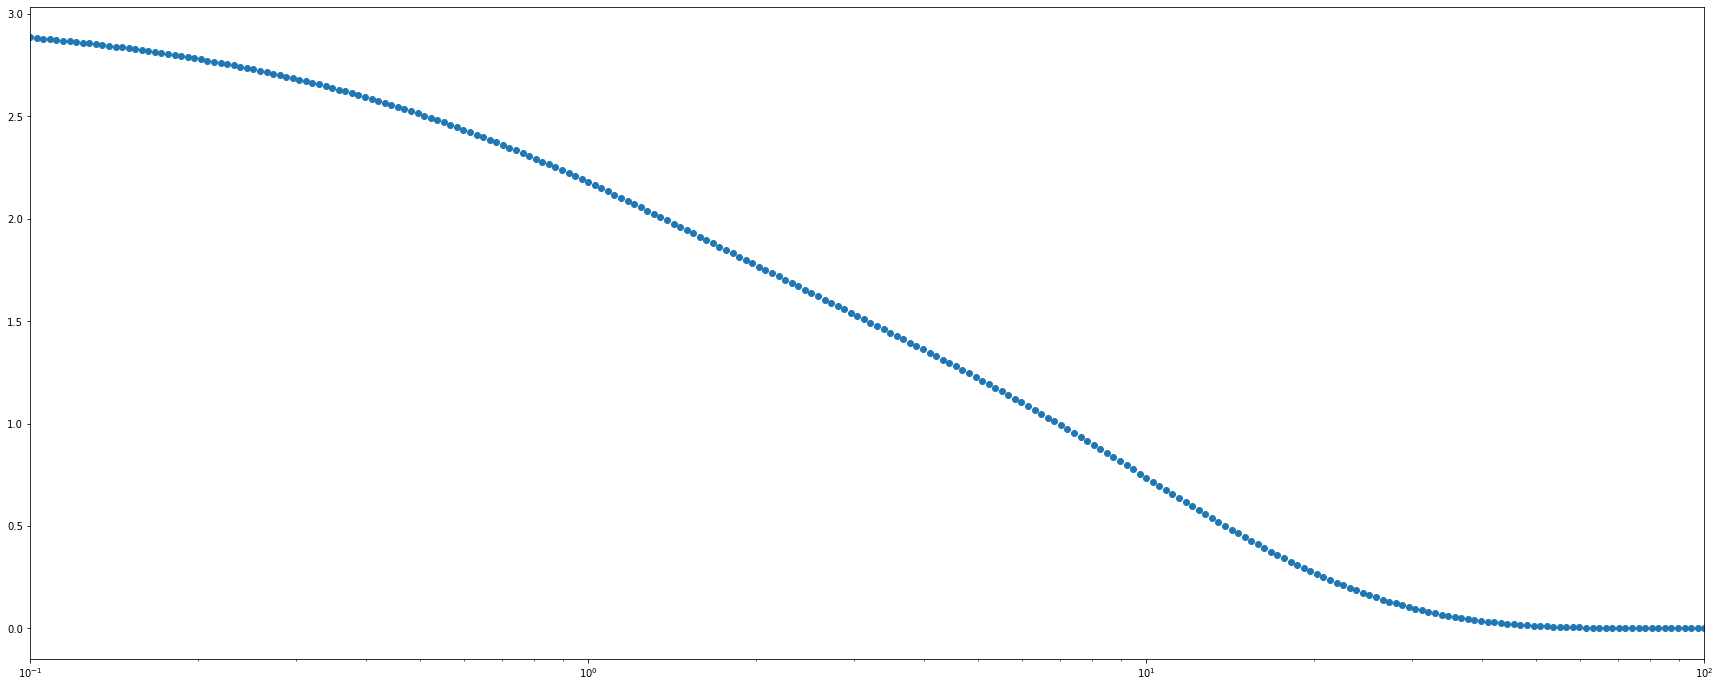

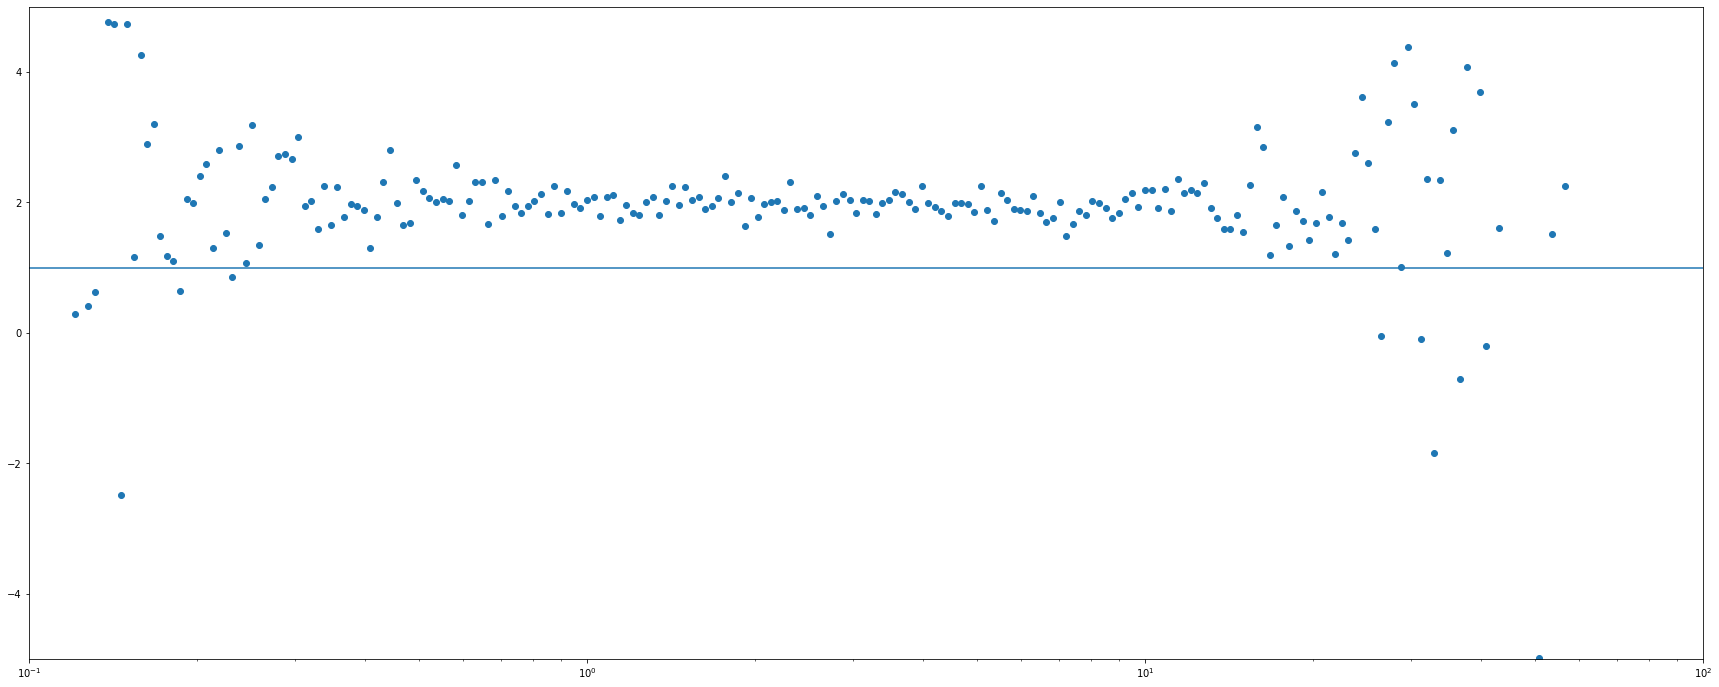

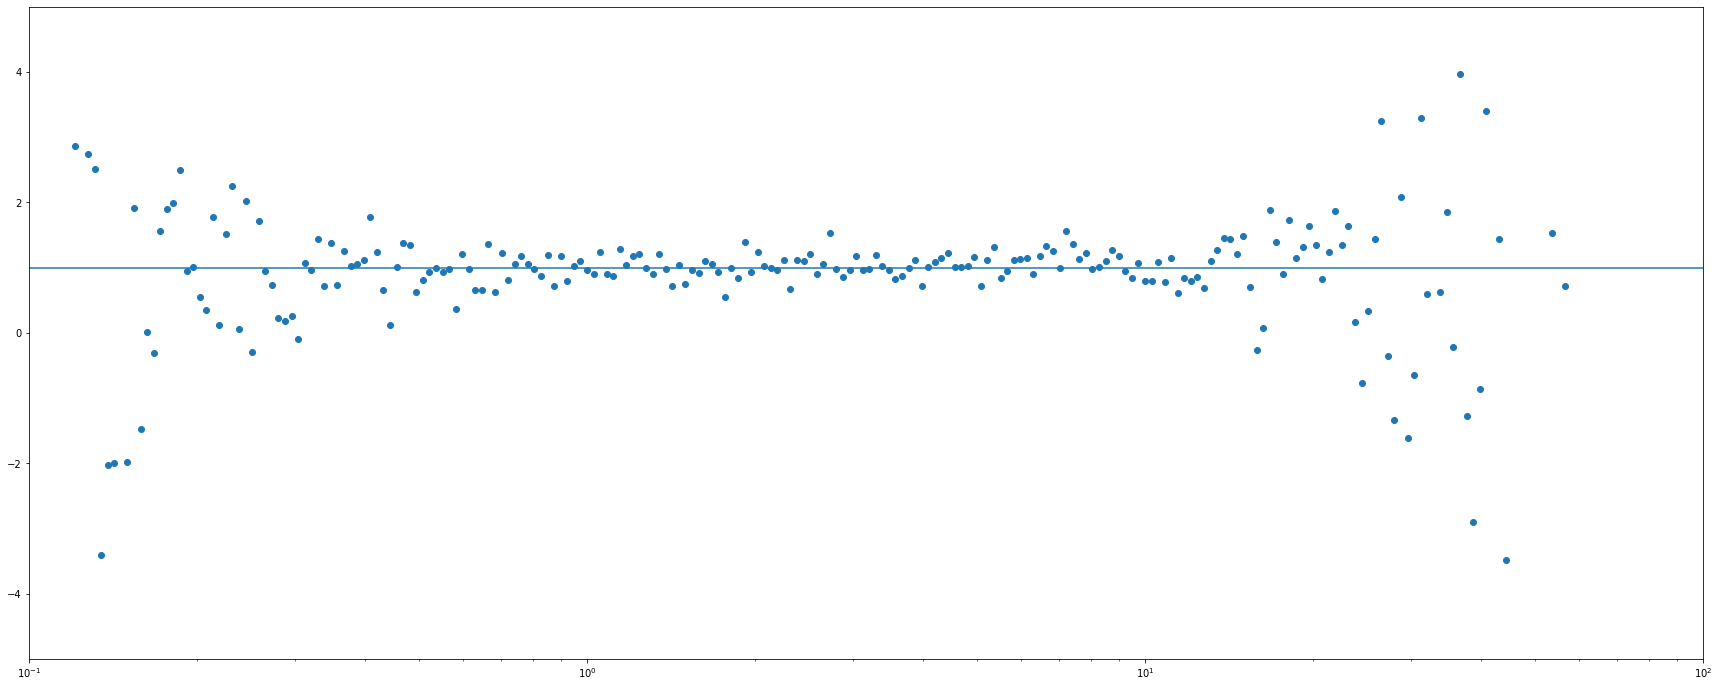

In [246]:
# Create synthetic biexponential decay data

def bi_exp(t, S1, S2):
    T1_1 = 10
    T1_2 = 1
    
    return S1 * np.exp(-t / T1_1) + S2 * np.exp(-t / T1_2)


S1_GT = 2
S2_GT = 1

plt.figure(figsize=(30,12))
plt.xlim(0.1, 100)

TAU = np.logspace(-1, 2, 256)

plt.scatter(TAU, bi_exp(TAU, S1_GT, S2_GT))
plt.xscale("log")


fitted = []
fitted_s2 = []

for i, t in enumerate(TAU):
    INTENSITY = bi_exp(np.array([TAU[0], t]), S1_GT, S2_GT) + np.array([0] + [np.random.normal(0, 1) * 0.1])
    params, covar = curve_fit(bi_exp, np.array([TAU[0], t]), INTENSITY)
    
    S1, S2 = params
    fitted += [S1]
    fitted_s2 += [S2]

plt.figure(figsize=(30,12))
plt.scatter(TAU, fitted)
plt.xscale("log")
plt.axhline(1)
plt.ylim(-5,5)
plt.xlim(.1, 100)
plt.plot()

plt.figure(figsize=(30,12))
plt.scatter(TAU, fitted_s2)
plt.xscale("log")
plt.axhline(1)

plt.ylim(-5, 5)
plt.xlim(.1, 100)
plt.plot()
    